In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
learning_rate = 0.0008
training_epochs = 1600
display_step = 40

In [3]:
inputX = np.array([[  2,   3],
                  [  1,   3]])
inputY = np.array([[  2,   3],
                  [  1,   3]])

In [4]:
x = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 2])

W = tf.Variable([[0.0,0.0],[0.0,0.0]])
b = tf.Variable([0.0,0.0])

In [5]:
layer1 = tf.add(tf.matmul(x, W), b)
y = tf.nn.softmax(layer1)

In [6]:
cost = tf.reduce_sum(tf.pow(y_-y,2))

optimizer =tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [8]:
avg_set = []
epoch_set = []

for i in range(training_epochs):
   sess.run(optimizer, feed_dict = {x: inputX, y_:inputY})

   if i % display_step == 0:
       cc = sess.run(cost, feed_dict = {x: inputX, y_:inputY})
       print(sess.run(y, feed_dict = {x:inputX}))


       print("Training step:", '%04d' % (i), "cost=", "{:.9f}".format(cc))
       avg_set.append(cc)
       epoch_set.append(i + 1)


[[0.4924006  0.5075994 ]
 [0.49320042 0.5067996 ]]
Training step: 0000 cost= 14.957809448
[[0.2738132  0.7261868 ]
 [0.29421356 0.70578647]]
Training step: 0040 cost= 13.911497116
[[0.17764217 0.82235783]
 [0.20141463 0.7985854 ]]
Training step: 0080 cost= 13.547078133
[[0.12976165 0.87023836]
 [0.15276803 0.847232  ]]
Training step: 0120 cost= 13.385889053
[[0.10182292 0.89817715]
 [0.12327544 0.8767246 ]]
Training step: 0160 cost= 13.297677994
[[0.08364542 0.9163546 ]
 [0.10351706 0.89648294]]
Training step: 0200 cost= 13.242458344
[[0.07090627 0.9290937 ]
 [0.08934286 0.9106571 ]]
Training step: 0240 cost= 13.204705238
[[0.06149239 0.9385076 ]
 [0.07866471 0.92133534]]
Training step: 0280 cost= 13.177268982
[[0.05425584 0.94574416]
 [0.07032111 0.9296789 ]]
Training step: 0320 cost= 13.156419754
[[0.04852123 0.9514788 ]
 [0.06361516 0.9363848 ]]
Training step: 0360 cost= 13.140033722
[[0.04386587 0.9561341 ]
 [0.05810328 0.9418968 ]]
Training step: 0400 cost= 13.126806259
[[0.040011

In [9]:
training_cost = sess.run(cost, feed_dict = {x: inputX, y_: inputY})
print("Training cost = ", training_cost, "\nW=", sess.run(W),
      "\nb=", sess.run(b))

Training cost =  13.033801 
W= [[-0.20886447  0.2088646 ]
 [-0.5504283   0.5504282 ]] 
b= [-0.18347593  0.18347599]


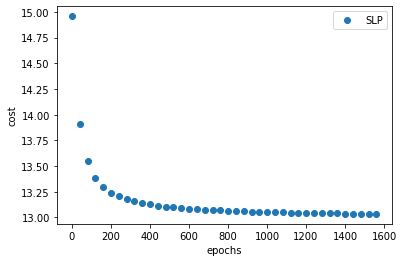

In [12]:
plt.plot(epoch_set,avg_set,'o',label = 'SLP')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()